![title](https://igws.indiana.edu/images/IGWS_Logo.svg)
# Macrostrat - 01 Process Regional Geologic Map of Indiana
## [Kevin Russell, GISP](https://igws.indiana.edu/staff.cfm?user=kevrusse)

In [1]:
import arcpy, os
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from arcpy import env
%matplotlib inline
import tkinter as tk #python3 import
from tkinter import ttk
from tkinter.filedialog import askopenfilename
from tkinter.filedialog import askdirectory
from tkinter.filedialog import asksaveasfilename
from pathlib import Path

In [2]:
tk.Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
source_loc = askdirectory(title='Where is the FOLDER containing your map data?')
source_path = Path(source_loc)

try:
    files = [file for file in source_path.iterdir() if file.suffix == '.shp']
    for file in files:
        print(file)
    print('{} files in total.'.format(len(files)))

except:
    print('Could not open the directory.')
finally:
    print('\nYour data is at: {}\n'.format(source_path))

results_loc = askdirectory(title='Where should I save the results (GEODATABASE)?')
results_path = Path(results_loc)

print('Saving data to: {}\n'.format(results_path))

\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Bedrock_Geology_RGM_250K_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Bedrock_Surface_250k_IGS_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\IN_Structural_Features.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\Petroleum_Fields_IGS_IN.shp
\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\structural_features_in.shp
5 files in total.

Your data is at: \\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap

Saving data to: \\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\IN_Structural_Features



In [3]:
file_types = [('shape files', '.shp'), ('all files', '.*') ]
#source_loc = r'\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap'
source_file = askopenfilename(title='Select the file to process.', initialdir=os.path.abspath(source_path), defaultextension = '.shp', filetypes = file_types)

In [4]:
# Set ArcGIS parameters
env.overwriteOutput = False
env.workspace = source_loc
file_desc = arcpy.Describe(source_file)
env.extent = file_desc.extent
fields = file_desc.fields
for field in fields:
    print(field.name)

FID
Shape
NAME
Symbol
Structure_
Source_Sho
Shape_Leng


In [5]:
dataframe = gpd.read_file(source_file)
dataframe.head(n=10)

,NAME,Symbol,Structure_,Source_Sho,Shape_Leng,geometry
0,Unnamed,Downthrown West,Fault,"Ault, C. H., et al., 1985, Faulting and jointi...",3642.507731,LINESTRING (518551.5624557724 4293832.49990361...
1,Sharpsville Fault,Downthrown East,Fault,"Hasenmueller, W. A., 2000, Bedrock geologic ma...",21042.082591,LINESTRING (584498.7497171909 4478214.99991533...
2,Kentland Disturbance,Downthrown North,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3721.014856,LINESTRING (469155.1912097689 4513267.13191598...
3,Kentland Disturbance,Downthrown North,Fault,"Tudor, D. S., 1971, A geophysical study of the...",2209.990556,LINESTRING (465960.3410307933 4514185.04500483...
4,Kentland Disturbance,Downthrown South,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3737.721221,LINESTRING (472366.5778367594 4512612.28685937...
5,Kentland Disturbance,Thrust North,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1389.399749,LINESTRING (466327.4511751346 4512716.60455546...
6,Kentland Disturbance,Downthrown West,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1027.025677,LINESTRING (465744.9779585926 4512119.76385091...
7,Kentland Disturbance,Downthrown North,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3897.726412,LINESTRING (468606.179753257 4512241.869451027...
8,Gutschick Fault,Downthrown West,Fault,"Tudor, D. S., 1971, A geophysical study of the...",5382.969257,LINESTRING (469462.6376100546 4510292.98880921...
9,Kentland Disturbance,n/a,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1324.947050,LINESTRING (467790.4676244976 4510825.68436170...


In [7]:
dataframe.describe()

,Shape_Leng
count,73.000000
mean,10446.326303
std,16849.388159
min,15.244681
25%,2060.412251
50%,5111.123863
75%,10072.697945
max,82844.175161


In [ ]:
dataframe.plot(figsize=(6,12), legend = True, column='Lithology') # for Regional Bedrock example

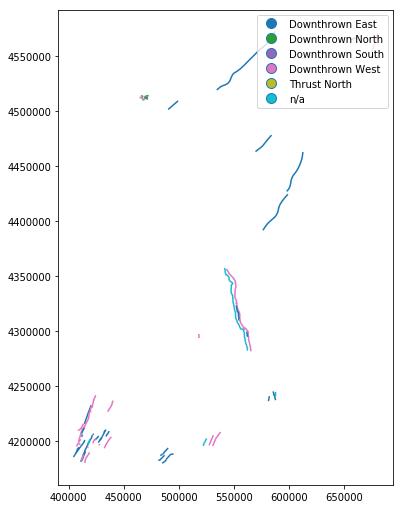

In [6]:
dataframe.plot(figsize=(6,12), legend = True, column='Symbol') # for Structural example

In [ ]:
coal = dataframe[dataframe['Lithology'] == 'Coal']
coal.plot(figsize=(6,12))

In [ ]:
coal = dataframe['Lithology'] == 'Coal'
shale = dataframe['Lithology'] == 'Shale'
coal_shale = dataframe[coal | shale]
coal_shale.head()
coal_shale.plot(figsize=(6,12), legend = True, column='Lithology', cmap='viridis')

In [7]:
macro_df = dataframe.assign(name = dataframe['NAME'], 
                            type = dataframe['Structure_'], 
                            direction = dataframe['Symbol'], 
                            descrip = 'Normal', 
                            #new_type = dataframe['NAME'].str.split(' ').str.get(1), 
                            new_type = dataframe['Structure_'],
                            source = dataframe['Source_Sho'])
macro_df = macro_df.drop(['NAME', 'Symbol', 'Structure_', 'Source_Sho'], axis=1)
macro_df.head()

,Shape_Leng,geometry,name,type,direction,descrip,new_type,source
0,3642.507731,LINESTRING (518551.5624557724 4293832.49990361...,Unnamed,Fault,Downthrown West,Normal,Fault,"Ault, C. H., et al., 1985, Faulting and jointi..."
1,21042.082591,LINESTRING (584498.7497171909 4478214.99991533...,Sharpsville Fault,Fault,Downthrown East,Normal,Fault,"Hasenmueller, W. A., 2000, Bedrock geologic ma..."
2,3721.014856,LINESTRING (469155.1912097689 4513267.13191598...,Kentland Disturbance,Fault,Downthrown North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the..."
3,2209.990556,LINESTRING (465960.3410307933 4514185.04500483...,Kentland Disturbance,Fault,Downthrown North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the..."
4,3737.721221,LINESTRING (472366.5778367594 4512612.28685937...,Kentland Disturbance,Fault,Downthrown South,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the..."


In [8]:
macro_df = macro_df[['name', 'type', 'direction', 'descrip', 'new_type', 'source', 'Shape_Leng', 'geometry']]
macro_df.head(n=20)

,name,type,direction,descrip,new_type,source,Shape_Leng,geometry
0,Unnamed,Fault,Downthrown West,Normal,Fault,"Ault, C. H., et al., 1985, Faulting and jointi...",3642.507731,LINESTRING (518551.5624557724 4293832.49990361...
1,Sharpsville Fault,Fault,Downthrown East,Normal,Fault,"Hasenmueller, W. A., 2000, Bedrock geologic ma...",21042.082591,LINESTRING (584498.7497171909 4478214.99991533...
2,Kentland Disturbance,Fault,Downthrown North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3721.014856,LINESTRING (469155.1912097689 4513267.13191598...
3,Kentland Disturbance,Fault,Downthrown North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",2209.990556,LINESTRING (465960.3410307933 4514185.04500483...
4,Kentland Disturbance,Fault,Downthrown South,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3737.721221,LINESTRING (472366.5778367594 4512612.28685937...
5,Kentland Disturbance,Fault,Thrust North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1389.399749,LINESTRING (466327.4511751346 4512716.60455546...
6,Kentland Disturbance,Fault,Downthrown West,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1027.025677,LINESTRING (465744.9779585926 4512119.76385091...
7,Kentland Disturbance,Fault,Downthrown North,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",3897.726412,LINESTRING (468606.179753257 4512241.869451027...
8,Gutschick Fault,Fault,Downthrown West,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",5382.969257,LINESTRING (469462.6376100546 4510292.98880921...
9,Kentland Disturbance,Fault,n/a,Normal,Fault,"Tudor, D. S., 1971, A geophysical study of the...",1324.947050,LINESTRING (467790.4676244976 4510825.68436170...


In [26]:
macro_df.to_file(r'\\BL-GEOY-Garnet\Data\KPR\Macrostrat\from_IndianaMap\IN_Structural_Features')